Data Collection and Preparation: You have access to the taxi trip data. Select the year(s) that have
been assigned to you and clean your dataset for use in later stages of your project. As the CSV file might
be too large for your computer to open it with Python, you could preprocess the file first with tools like
“sed” or “xsv” in order to filter out not needed rows and columns. To obtain hourly weather data, access
the links provided above (or reach out to us). Also, provide a detailed description of the trip dataset
such that there are no pending questions. Due to privacy reasons, spatial data is given only on census
tract level. To better analyze location data – specifically in lower dimensions - further discretize the city
in scope with the help of suitable tools (such as a matrix of hexagons using h3-Uber). This discretization
is crucial for the analysis of the spatial resolution. Furthermore, you should also consider different
temporal discretization (e.g., hourly, 4-hourly, daily) etc.

In [41]:
import pandas as pd
import h3pandas
import fastparquet
import geopandas as gpd
import seaborn as sns

In [42]:
df = pd.read_parquet('../../data/Taxi_Trips_Sampled.parquet')

In [43]:
print(df['Trip Seconds'].min(), df['Trip Seconds'].max())

0.0 86340.0


<Axes: xlabel='Trip Seconds', ylabel='Count'>

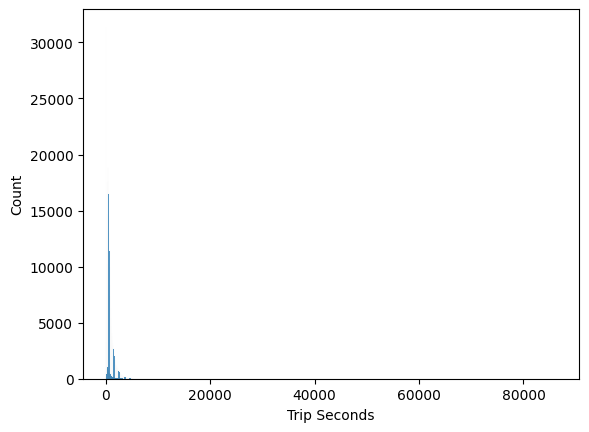

In [44]:
sns.histplot(df, x="Trip Seconds")

In [45]:
df = df[df['Trip Seconds'] < 7200]
#Seconds shows 0, if trip is under 5 mins of length.

In [55]:
print(df['Trip Miles'].min(), df['Trip Miles'].max())

0.0 2060.0


In [46]:
print(df['Trip Start Timestamp'].min(), df['Trip Start Timestamp'].max())
print(df['Trip End Timestamp'].min(), df['Trip End Timestamp'].max())

01/01/2015 01:00:00 AM 12/31/2015 12:45:00 AM
01/01/2015 01:00:00 AM 12/31/2015 12:45:00 AM


In [47]:
df.head(10)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas
index,,,,,,,,,,,,,,,,,,,,,
28201628,4889f5e0b43baf8d24b0f19452b52f37cc91f2db,c658af10e0654aeacebeaa2ac70c886507b531ca613c86...,02/17/2015 07:15:00 AM,02/17/2015 07:15:00 AM,320.0,1.2,1.703128e+10,1.703132e+10,28.0,32.0,...,5.85,Cash,Yellow Cab,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),29.0
3254456,2806ed4edda25969b571224fb40cdbcfea2f0604,af3b4b23f34495cb17ffb1b5ba884c08a6266690661eb2...,11/17/2015 06:30:00 PM,11/17/2015 06:30:00 PM,0.0,0.1,1.703108e+10,1.703108e+10,8.0,8.0,...,3.25,Cash,Northwest Management LLC,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),37.0
29645912,32694409501bb86c5d4cfc96cdd369d85c354e7b,1582de696de19a2f348c2f627a9fcc10906567e5c51494...,02/01/2015 08:45:00 AM,02/01/2015 09:00:00 AM,780.0,3.5,NaN,NaN,3.0,21.0,...,10.25,Cash,Taxi Affiliation Services,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.938666,-87.711211,POINT (-87.7112105933 41.93866619620001),31.0
25196547,e0a545c44c297bac41bfe456665cd06145c5f66e,4f189764b8d9b6f71f7936ab414cac07634be0a00790ca...,03/19/2015 10:00:00 AM,03/19/2015 10:15:00 AM,360.0,0.0,1.703108e+10,1.703108e+10,8.0,8.0,...,5.25,Cash,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),37.0
23652576,110a2816b716b70868b2db3cc4e629a2c2a500e8,d22d9c59cf15244c51bfaa145bc2fadb214a9620bca0a3...,04/04/2015 07:00:00 PM,04/04/2015 07:15:00 PM,900.0,4.7,NaN,NaN,NaN,NaN,...,15.25,Credit Card,None,NaN,NaN,None,NaN,NaN,None,NaN
25863680,ee96143e64bf2a380a4c17a62c67e311a254a17f,a69c4405c2411af33a80bb6f4c566349e542284b0ef109...,03/12/2015 07:45:00 PM,03/12/2015 08:00:00 PM,600.0,2.3,1.703133e+10,1.703108e+10,33.0,8.0,...,11.65,Credit Card,None,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),34.0
7318152,8b57c50d0bab954ba9b8dc0eadc6fb0c6eefe238,8b11a1727a85dc849f117c39cd42b7bab4b7e8ef32d0a2...,10/01/2015 02:30:00 PM,10/01/2015 02:45:00 PM,600.0,3.1,NaN,NaN,8.0,7.0,...,9.85,Cash,Choice Taxi Association,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),37.0
24282064,518285e039a7fd5c93a870cb111654947415aa13,c623d0124062bae02ec972e94b6c105798514e12bf2a5d...,03/28/2015 11:30:00 AM,03/28/2015 11:45:00 AM,660.0,1.8,NaN,NaN,24.0,22.0,...,8.25,Cash,Choice Taxi Association,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.922761,-87.699155,POINT (-87.69915534320002 41.9227606205),25.0
30695287,1bbae0a706021cedecc1aaeba47a2cca3a0321d1,bc926a3f4b4b068427b4bc0c26e4d1d5fe59aff0633768...,01/20/2015 11:15:00 PM,01/20/2015 11:15:00 PM,240.0,0.8,NaN,NaN,NaN,NaN,...,5.25,Cash,None,NaN,NaN,None,NaN,NaN,None,NaN


In [48]:
cols_to_remove = ['Trip ID', 'Taxi ID', 'Pickup Community Area', 'Dropoff Community Area', 'Pickup Centroid Location', 'Dropoff Centroid  Location', 'Community Areas', 'Payment Type']

df = df.drop(columns=cols_to_remove)

In [49]:
df.isna().sum()

Trip Start Timestamp               0
Trip End Timestamp                 0
Trip Seconds                       0
Trip Miles                         0
Pickup Census Tract           112908
Dropoff Census Tract          114365
Fare                               4
Tips                               4
Tolls                          49779
Extras                             4
Trip Total                         4
Company                        96465
Pickup Centroid Latitude       43109
Pickup Centroid Longitude      43109
Dropoff Centroid Latitude      48593
Dropoff Centroid Longitude     48593
dtype: int64

In [50]:
#Remove NaN that don't allow spetial discretization
df = df.dropna(subset=['Pickup Census Tract', 'Dropoff Census Tract','Dropoff Centroid Latitude', 'Dropoff Centroid Longitude', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude'])

In [51]:
df.isna().sum()

Trip Start Timestamp              0
Trip End Timestamp                0
Trip Seconds                      0
Trip Miles                        0
Pickup Census Tract               0
Dropoff Census Tract              0
Fare                              1
Tips                              1
Tolls                         35063
Extras                            1
Trip Total                        1
Company                       59808
Pickup Centroid Latitude          0
Pickup Centroid Longitude         0
Dropoff Centroid Latitude         0
Dropoff Centroid Longitude        0
dtype: int64

In [52]:
df.head(10)

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Fare,Tips,Tolls,Extras,Trip Total,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
index,,,,,,,,,,,,,,,,
28201628,02/17/2015 07:15:00 AM,02/17/2015 07:15:00 AM,320.0,1.2,1.703128e+10,1.703132e+10,5.85,0.0,NaN,0.0,5.85,Yellow Cab,41.885300,-87.642808,41.884987,-87.620993
3254456,11/17/2015 06:30:00 PM,11/17/2015 06:30:00 PM,0.0,0.1,1.703108e+10,1.703108e+10,3.25,0.0,0.0,0.0,3.25,Northwest Management LLC,41.890922,-87.618868,41.890922,-87.618868
25196547,03/19/2015 10:00:00 AM,03/19/2015 10:15:00 AM,360.0,0.0,1.703108e+10,1.703108e+10,5.25,0.0,0.0,0.0,5.25,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,41.898332,-87.620763
25863680,03/12/2015 07:45:00 PM,03/12/2015 08:00:00 PM,600.0,2.3,1.703133e+10,1.703108e+10,8.65,3.0,0.0,0.0,11.65,None,41.859350,-87.617358,41.890922,-87.618868
2535614,11/27/2015 02:30:00 PM,11/27/2015 02:45:00 PM,360.0,1.1,1.703132e+10,1.703132e+10,5.85,0.0,NaN,1.0,6.85,Yellow Cab,41.870607,-87.622173,41.884987,-87.620993
18475620,05/28/2015 10:15:00 PM,05/28/2015 10:30:00 PM,600.0,1.7,1.703106e+10,1.703106e+10,7.65,0.0,0.0,0.0,7.65,Taxi Affiliation Services,41.941488,-87.671108,41.943155,-87.640698
8751006,09/15/2015 11:30:00 AM,09/15/2015 11:30:00 AM,540.0,1.2,1.703184e+10,1.703108e+10,6.85,0.0,0.0,0.0,6.85,None,41.880994,-87.632746,41.895033,-87.619711
22004015,04/22/2015 11:30:00 AM,04/22/2015 11:30:00 AM,0.0,0.0,1.703198e+10,1.703198e+10,3.25,0.0,0.0,0.0,3.25,Taxi Affiliation Services,41.979071,-87.903040,41.979071,-87.903040
6676793,10/08/2015 10:45:00 PM,10/08/2015 11:00:00 PM,480.0,1.8,1.703108e+10,1.703183e+10,7.25,0.0,0.0,0.0,7.25,Northwest Management LLC,41.892042,-87.631864,41.879067,-87.657005


In [53]:
for h3_res in range(7,10):
    for action in ['Pickup', 'Dropoff']:
        df = df.h3.geo_to_h3(h3_res, f"{action} Centroid Latitude", f"{action} Centroid Longitude", set_index=False)
        h3_col = "h3_" + "{:02d}".format(h3_res)
        df[f'{h3_col}_{action}'] = df[h3_col]
        del df[h3_col]

In [54]:
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'])

df['hour'] = df['date'].dt.hour
df['4_hour_block'] = df['hour'] // 4
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.week
df['month'] = df['date'].dt.monthv

df['Pickup Census Tract'] = df['Pickup Census Tract'].astype('int64')
df['Dropoff Census Tract'] = df['Dropoff Census Tract'].astype('int64')

KeyError: 'date'

In [ ]:
df_distinct_values = df[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']].drop_duplicates()
distinct_values_tuples = list(df_distinct_values.itertuples(index=False, name=None))

In [ ]:
import folium

In [ ]:
trips_heatmap = folium.Map(
    location=(41.881832, -87.623177), # the orig mean values as location coordinates from https://www.latlong.net/place/chicago-il-usa-1855.html
    zoom_start=12,
    control_scale=True,
    max_zoom=20,
)

folium.GeoJson(
    "../../data/Chicago.geojson",
    name='geojson'
).add_to(trips_heatmap)

for lat, lon in distinct_values_tuples:
    folium.CircleMarker(
        radius=1,
        location=[lat, lon],
        color="crimson",
        fill_color="crimson",
    ).add_to(trips_heatmap)

trips_heatmap


In [ ]:
# Create GeoSeries for pickup and dropoff locations
df['Pickup Centroid'] = gpd.points_from_xy(df['Pickup Centroid Longitude'], df['Pickup Centroid Latitude'])
df['Dropoff Centroid'] = gpd.points_from_xy(df['Dropoff Centroid Longitude'], df['Dropoff Centroid Latitude'])

df = df.drop(columns=['Pickup Centroid Longitude', 'Pickup Centroid Latitude', 'Dropoff Centroid Longitude', 'Dropoff Centroid Latitude'])

In [ ]:
df.head(10)

In [ ]:
df.info()